<a href="https://colab.research.google.com/github/sayanarajasekhar/PyTorch/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Neural Network Classification

## What is a classification problem?

A classification problem involves predicting whether something is one thing or another.

| Problem type | What is it? | Example |
|--------------|-------------|---------|
| Binary classification	| Target can be one of two options,<br> e.g. yes or no | Predict whether or not someone has heart disease <br>based on their health parameters. |
|Multi-class classification	| Target can be one of more than <br>two options | 	Decide whether a photo is of food, a person or a dog. |
| Multi-label classification	| Target can be assigned <br> more than one option	| Predict what categories should be assigned to a <br>Wikipedia article (e.g. mathematics, science & philosophy). |

| Topic |	Contents |
|-------|----------|
| **0. Architecture of a <br>classification neural network**	| Neural networks can come in almost any shape or size, <br>but they typically follow a similar floor plan. |
| **1. Getting binary <br>classification data ready**	| Data can be almost anything but to get started we're going to <br>create a simple binary classification dataset. |
| **2. Building a PyTorch <br>classification model**	| Create a model to learn patterns in the data, we'll also choose a <br>**loss function**, **optimizer** and build a **training loop** specific to classification. |
| **3. Fitting the model to <br>data (training)** | 	We've got data and a model, <br>now let's let the model (try to) find patterns in the (training) data. |
| **4. Making predictions and <br>evaluating a model (inference)**	| Our model's found patterns in the data, <br>let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model <br>(from a model perspective)** | We've trained and evaluated a model but it's not working, <br>let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, <br>what about non-linear (non-straight) lines? |
| **7. Replicating non-linear <br>functions**	| We used **non-linear functions** to help model <br>non-linear data, but what do these look like? |
| **8. Putting it all together <br>with multi-class classification** | Let's put everything we've done so far for binary classification <br>together with a multi-class classification problem. |

## 0. Architecture of a classification neural network

Let's look at the general architecture of a classification neural network.

| Hyperparameter	| Binary Classification	| Multiclass classification |
|--------------|--------------|-----------|
| **Input layer shape** <br>(in_features) | Same as number of features (e.g. 5 for age, sex, height, <br>weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** |	Problem specific, minimum = 1, maximum = unlimited	| Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** <br> (out_features) | 1 (one class or the other) |	1 per class (e.g. 3 for food,<br> person or dog photo) |
| **Hidden layer activation** |	Usually ReLU (rectified linear unit) <br> but can be [many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) <br>in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) <br>in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), <br>[Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options)	| Same as binary classification |

## 1. Getting binary classification data ready

Use the [make_circles()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) method from Scikit-Learn to generate two circles with different coloured dots.

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

len(X), len(y), X.shape, y.shape

(1000, 1000, (1000, 2), (1000,))

In [2]:
print(f"First 5 samples of X: \n{X[:5]}\n")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y: 
[1 1 1 1 0]


In [3]:
# Make DataFrame of circle data for visualization
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "labels": y})
circles.head(10)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


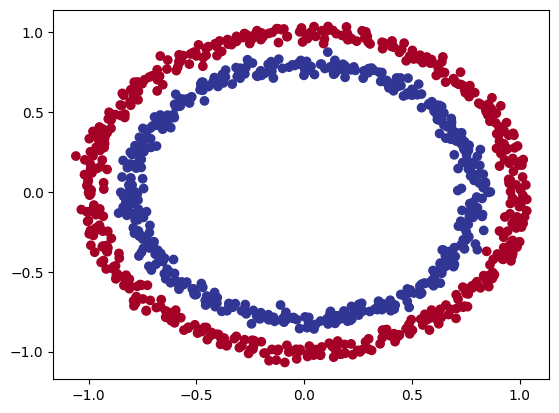

In [4]:
# Visualization cricle data in plt
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu)

> Note: The data we're working with is often refered to as a **toy dataset**, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Input and output shapes

In [5]:
# Checking features and labels shape
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"One sample of feature data of X: {X_sample}")
print(f"One sample of label data of y: {y_sample}")
print(f"Shape of one sample of feature data of X: {X_sample.shape}")
print(f"Shape of one sample of label data of y: {y_sample.shape}")

One sample of feature data of X: [0.75424625 0.23148074]
One sample of label data of y: 1
Shape of one sample of feature data of X: (2,)
Shape of one sample of label data of y: ()


### 1.2 Turn data into tensors and create train and test splits

In [7]:
import torch
torch.__version__

'2.8.0+cu126'

In [8]:
# Turn data into tensors
X = torch.from_numpy(X)
y = torch.from_numpy(y)

print(len(X), len(y), X.dim(), y.dim(), X.dtype, y.dtype)

# Converting float64 to float32 since PyTorch default datatype is float32

X = X.type(torch.float)
y = y.type(torch.float)

X.dtype, y.dtype

1000 1000 2 1 torch.float64 torch.int64


(torch.float32, torch.float32)

In [9]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
# Split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, # 0.2 = 20% of data for test & 80% of data for train
                                                    random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a PyTorch classification model

Let's build a model to classify blue and red dots.

1. Settings up device agnostic code (So our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing `nn.Module`
3. Defining a loss function and optimizer.
4. Creating a training loop

### 2.1 Settings up device agnostic code

In [11]:
# Import PyTorch and nn
import torch
from torch import nn

# Settings up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 2.2 Constructing a model by subclassing `nn.Module`

1. Subclass `nn.Module`
2. Create `2` `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define `forward()` method that outlines the forward pass or forward computation of the model
4. Instantiate model class and send it to target `device`

In [12]:
# 1. Construct a model subclassing nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.linear layers capable of handling the shapes of our data
    self.layer1 = nn.Linear(in_features=2,  # takes in 2 features from X
                            out_features=5) # and upscales to 5 features
    self.layer2 = nn.Linear(in_features=5,  # takes in 5 upscaled features from layer1
                            out_features=1) # and output one feature y

  #  3. Define forward() method that outlines the forward pass
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer2(self.layer1(x)) # x -> layer1 -> layer2 -> output


# 4. Instantiate model class and send it to target device
model_0 = CircleModelV0().to(device)
print(model_0, model_0.state_dict(), model_0.parameters, next(model_0.parameters()).device, sep="\n\n")


CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

OrderedDict({'layer1.weight': tensor([[ 0.3854,  0.2422],
        [-0.6264,  0.5417],
        [-0.4418, -0.1459],
        [ 0.2332,  0.0931],
        [-0.1721,  0.2468]]), 'layer1.bias': tensor([ 0.5243, -0.0931, -0.7053, -0.3138,  0.4125]), 'layer2.weight': tensor([[-0.0277,  0.0051, -0.3082, -0.0685, -0.4043]]), 'layer2.bias': tensor([-0.2455])})

<bound method Module.parameters of CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)>

cpu


#### 2.2.1 Replicating model using `nn.Sequential()`

In [13]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}")
print(f"Shape of predictions: {untrained_preds.shape}")
print(f"Lenght of test labels: {len(y_test)}")
print(f"Shape of test labels: {y_test.shape}")

print(f"\n First 10 predictions:\n{untrained_preds[:10]}")
print(f"\n First 10 labels:\n{y_test[:10]}")

Length of predictions: 200
Shape of predictions: torch.Size([200, 1])
Lenght of test labels: 200
Shape of test labels: torch.Size([200])

 First 10 predictions:
tensor([[-0.2989],
        [-0.2482],
        [-0.2915],
        [-0.3015],
        [-0.0691],
        [-0.0399],
        [-0.0736],
        [-0.0243],
        [-0.3009],
        [-0.2424]])

 First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 3. Fitting the model to data (training)

### 3.1 Setup loss function and optimizer

Loss Functions
* For regression you might want **MAE** or **MSE** (mean absolute error or mean square error)
* For classification you might want [**binary cross entropy**](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) or **categorical cross entropy** (cross entropy)

Optimizer
* Stochastic gradient descent optimizer(SGD, `torch.optim.SGD()`) can be used for a range of problems, so can Adam optimizer (`torch.optim.Adam()`)


| **Loss function/Optimizer** | **Problem type** | **PyTorch Code** |
|-----------|----------|-----------|
|Stochastic Gradient Descent <br>(SGD) optimizer | Classification, regression, <br>many others.	| [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, <br> many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss	| Binary classification	| [`torch.nn.BCEWithLogitsLoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or <br> [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Mutli-class classification	| [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) |
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |

<br>
PyTorch has two binary cross entropy implementaions:

1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features)
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in.

The [documentation for](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) `torch.nn.BCEWithLogitsLoss()` states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer.

So generally, implementation `2` is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()`

In [15]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function build-in

# Create optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [16]:
# Calculate accuracy - out otf 100 example, what percentage does our model gets right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### 3.1 Train Model

To train our model, we are going to build training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. optimize step (gradient descent)

#### 3.1.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification

Then we can convert out model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [17]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test).to(device)
y_logits[:5], y_test[:5]

(tensor([[-0.2989],
         [-0.2482],
         [-0.2915],
         [-0.3015],
         [-0.0691]]),
 tensor([1., 0., 1., 0., 1.]))

In [18]:
# Use the sigmoid activation function on our model logits to turn them into prediction probaabilities
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob[:5]

tensor([[0.4258],
        [0.4383],
        [0.4276],
        [0.4252],
        [0.4827]])

For our prediction probability values, we need to perform a range-style rounding on them

* `y_pred_prob` >= 0.5, `y=1` (class 1)
* `y_pred_prob` < 0.5, `y=0` (class 0)

In [19]:
torch.round(y_pred_prob)[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [20]:
# Find the predicted labels
y_pred = torch.round(y_pred_prob)

# In full (logits -> pred prob -> pred labels)
model_0.eval()
with torch.inference_mode():
  y_pred_labels = torch.round(torch.sigmoid(model_0(X_test).to(device)))

# Check for equality
print(torch.eq(y_pred.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

#### 3.2 Building a training and testing loop

In [21]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to traget device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.train()

  # 1. Forward pass (model output raw logits)
  y_logits = model_0(X_train).squeeze() # Squeeze to remove extra `1`dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred prod -> pred labels

  # 2. Calculate loss/accuracy
  train_loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                       y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred )

  # 3. optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ## Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_labels = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_labels)

  # Print out what's happening every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69930 | Accuracy: 47.75% | Test Loss: 0.69940 | Test Acc: 47.50%
Epoch: 10 | Loss: 0.69607 | Accuracy: 47.25% | Test Loss: 0.69688 | Test Acc: 45.00%
Epoch: 20 | Loss: 0.69485 | Accuracy: 49.62% | Test Loss: 0.69601 | Test Acc: 43.50%
Epoch: 30 | Loss: 0.69429 | Accuracy: 49.38% | Test Loss: 0.69565 | Test Acc: 47.50%
Epoch: 40 | Loss: 0.69397 | Accuracy: 49.38% | Test Loss: 0.69545 | Test Acc: 49.00%
Epoch: 50 | Loss: 0.69375 | Accuracy: 50.00% | Test Loss: 0.69531 | Test Acc: 49.50%
Epoch: 60 | Loss: 0.69359 | Accuracy: 49.50% | Test Loss: 0.69520 | Test Acc: 49.50%
Epoch: 70 | Loss: 0.69346 | Accuracy: 49.88% | Test Loss: 0.69512 | Test Acc: 49.00%
Epoch: 80 | Loss: 0.69336 | Accuracy: 50.38% | Test Loss: 0.69504 | Test Acc: 49.00%
Epoch: 90 | Loss: 0.69329 | Accuracy: 50.12% | Test Loss: 0.69499 | Test Acc: 48.50%


Accuracy barely moves above 50% on each split

Because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing

## 4. Making predictions and evaluating a model

From the metrics it looks like our model is guessing randomly

Let's make a plot of our model's predictions. the dat it't trying to predict on and the decisiob boundary it's creating for whether something is class 0 or 1

Lets download and inport helper_functions.py script.

It contains a helpful function called `plot_decisiion_boundary()` which creates a Numpy meshgrid to visually plot the different points where our model is predicting certain classes

Lets import



In [22]:
# Importing libraries from different git repo's

import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists, skipping download")
else:
  response = requests.get("https://raw.githubusercontent.com/sayanarajasekhar/PyTorch/refs/heads/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(response.content)


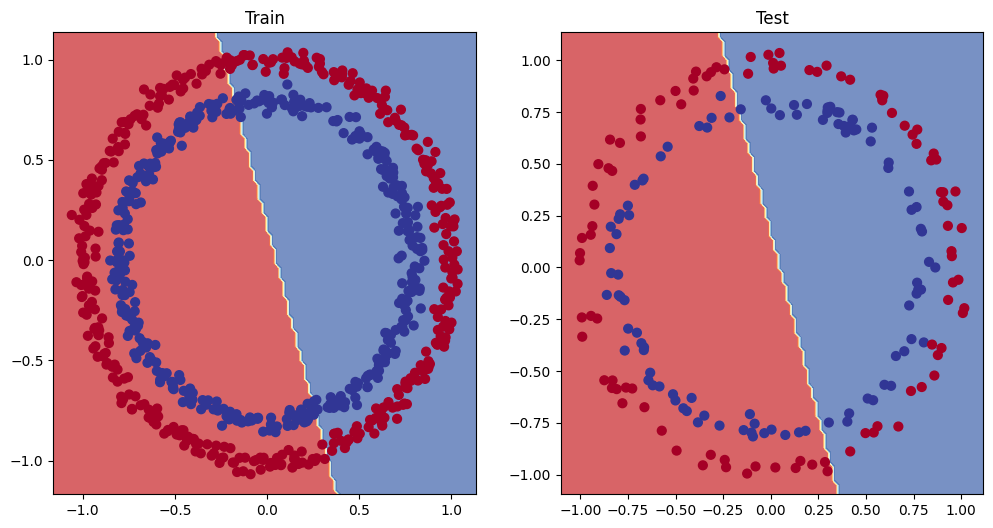

In [23]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

It seems like we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line ...

That explains the 50% accuracy. Since our data is circular, drawing a string line can at best cut it down the midde

In machine learing terms, our model is **underfitting**, meaning it's not learning predictive patterns from the data

## 5. Improving model

Let's try to fix our model's underfitting problem.

Focusing specifically on the model (not the data), there are a few ways we could do this.

| **Model improvement technique*** | What does it do? |
|--------------------|--------------------|
| **Add more layers** |	Each layer potentially increases the learning capabilities of the model with each layer being able <br>to learn some kind of new pattern in the data, more layers is often referred to as making <br>your **neural network deeper**. |
| **Add more hidden units** |	Similar to the above, more hidden units per layer means a potential increase in <br>learning capabilities of the model, more hidden units is often referred to as making your <br>**neural network wider**. |
| **Fitting for longer <br>(more epochs)** | Your model might learn more if it had more opportunities to look <br>at the data. |
| **Changing the <br>activation functions** |	Some data just can't be fit with only straight lines (like what we've seen), <br>using non-linear activation functions can help with this. |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how <br>much a model should change its parameters each step, too much and the model overcorrects, <br>too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different <br>loss functions. For example, a binary cross entropy loss function won't work with a <br>multi-class classification problem. |
| **Use transfer learning** |	Take a pretrained model from a problem domain similar to yours and adjust it to your <br>own problem |

> Note: because you can adjust all of these by hand, they're referred to as **hyperparameters**. <br><br>
And this is also where machine learning's half art half science comes in, there's no real way to know here what the best combination of values is for your project, best to follow the data scientist's motto of "experiment, experiment, experiment"

Let's see what happens if we add an `extra layer` to our model, fit for longer (epochs=`1000` instead of epochs=`100`) and increase the number of hidden units from `5` to `10`.

In [24]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer3(self.layer2(self.layer1(x)))

model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

Now we've got a model, we'll recreate a loss function and optimizer instance, using the same settings as before.

In [25]:
# loss_fn = nn.BCELoss() # this requires sigmoid

loss_fn = nn.BCEWithLogitsLoss() # Sigmoid not required
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

This time train for longer (epochs=`1000` vs epochs=`100`) and see if it improves our model.

In [26]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss
  train_loss = loss_fn(y_logits, y_train)
  train_acc = accuracy_fn(y_true = y_train,
                          y_pred = y_preds)

  # 3. optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward (Backward propagation)
  train_loss.backward()

  # 5. optimize step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_preds)

  # Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f}, Train Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Train Loss: 0.69396, Train Accuracy: 50.88% | Test Loss: 0.69261, Test Accuracy: 51.00%
Epoch: 100 | Train Loss: 0.69305, Train Accuracy: 50.38% | Test Loss: 0.69379, Test Accuracy: 48.00%
Epoch: 200 | Train Loss: 0.69299, Train Accuracy: 51.12% | Test Loss: 0.69437, Test Accuracy: 46.00%
Epoch: 300 | Train Loss: 0.69298, Train Accuracy: 51.62% | Test Loss: 0.69458, Test Accuracy: 45.00%
Epoch: 400 | Train Loss: 0.69298, Train Accuracy: 51.12% | Test Loss: 0.69465, Test Accuracy: 46.00%
Epoch: 500 | Train Loss: 0.69298, Train Accuracy: 51.00% | Test Loss: 0.69467, Test Accuracy: 46.00%
Epoch: 600 | Train Loss: 0.69298, Train Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 700 | Train Loss: 0.69298, Train Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 800 | Train Loss: 0.69298, Train Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 900 | Train Loss: 0.69298, Train Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy:

Our model trained for longer and with an extra layer but it still looks like it didn't learn any patterns better than random guessing.

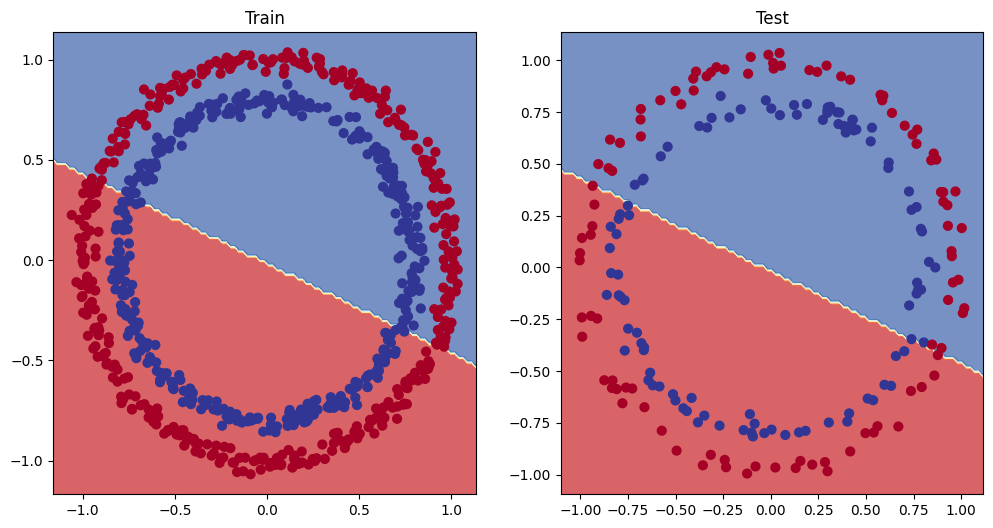

In [27]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Our model is still drawing a straight line between the red and blue dots.

If our model is drawing a straight line, could it model linear data? Like we did in [notebook 01](https://github.com/sayanarajasekhar/PyTorch/blob/main/01_pytorch_workflow.ipynb).

### 5.1 Preparing data to see if our model can work with stright line

Let's create some linear data to see if our model's able to learn from data

In [28]:
# Create some data
weight = 0.7
bias = 0.3

start, end, step = 0, 1, 0.01

# Create features and labels
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
print(f"Length of X: {len(X_regression)}. \nLength of y: {len(y_regression)}")

# Create train and test split
split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:split], y_regression[:split]
X_test_regression, y_test_regression = X_regression[split:], y_regression[split:]

print(f"Length of training features: {len(X_train_regression)}. \nLength of training labels: {len(y_train_regression)}")
print(f"Length of testing features: {len(X_test_regression)}. \nLength of testing labels: {len(y_test_regression)}")

Length of X: 100. 
Length of y: 100
Length of training features: 80. 
Length of training labels: 80
Length of testing features: 20. 
Length of testing labels: 20


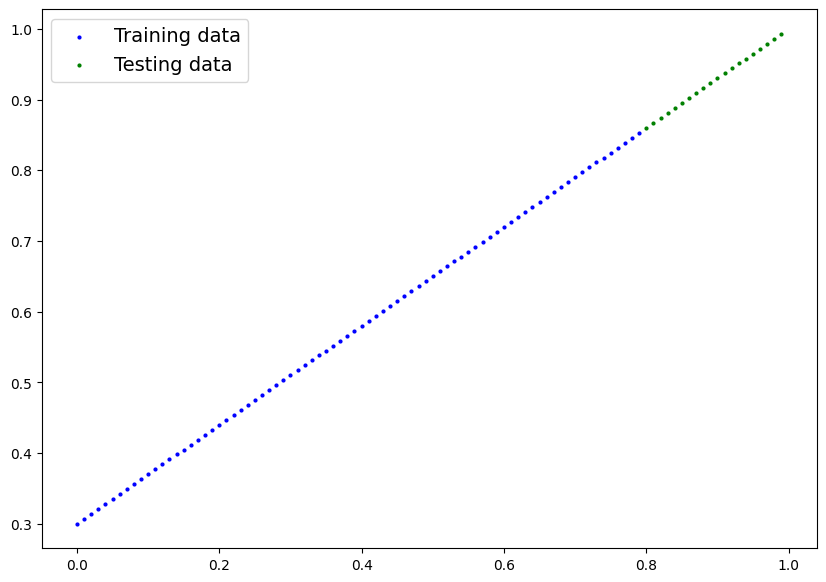

In [29]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

Now we've got some data, let's recreate `model_1` but with a loss function suited to our regression data.

In [30]:
# Same architecture as model_1 but using nn.Sequential
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

Setup the loss function to be nn.L1Loss() (the same as mean absolute error) and the optimizer to be torch.optim.SGD().

In [31]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

Now let's train the model using the regular training loop steps for epochs=`1000` (just like `model_1`).

> Note: We've been writing similar training loop code over and over again. I've made it that way on purpose though, to keep practicing. However, do you have ideas how we could functionize this? That would save a fair bit of coding in the future. Potentially there could be a function for training and a function for testing.

In [32]:
# Train the model
torch.manual_seed(42)

# Set the number of eppchs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  ### Training
  model_2.train()

  # 1. Forward pass
  train_preds = model_2(X_train_regression)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train_regression)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward (Backward propagation)
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_preds = model_2(X_test_regression)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds, y_test_regression)

  # Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {train_loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858, Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533, Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137, Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964, Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940, Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903, Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878, Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840, Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798, Test loss: 0.00360


Okay, unlike `model_1` on the classification data, it looks like `model_2`'s loss is actually going down.

Let's plot its predictions to see if that's so.

And remember, since our model and data are using the target `device`, and this device may be a GPU, however, our plotting function uses `matplotlib` and matplotlib can't handle data on the GPU.

To handle that, we'll send all of our data to the CPU using `.cpu()` when we pass it to `plot_predictions()`.

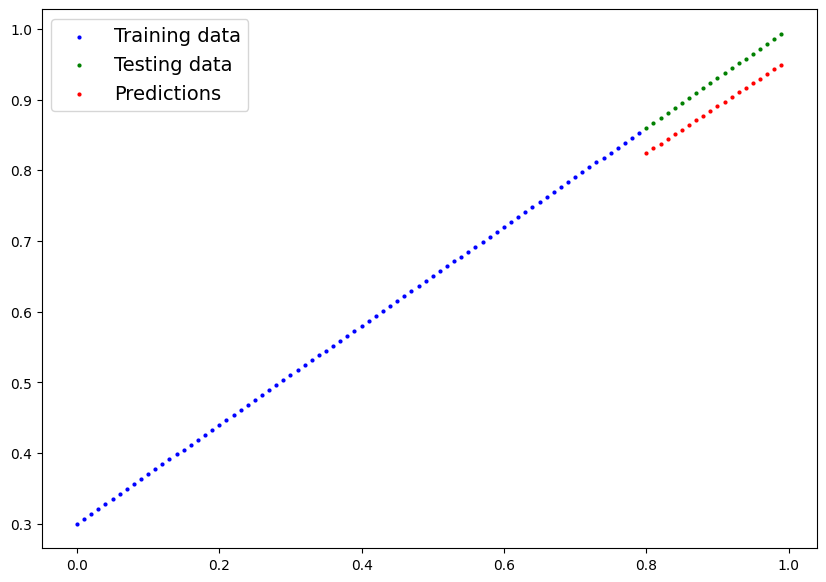

In [33]:
# Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

Alright, it looks like our model is able to do far better than random guessing on straight lines.

This is a good thing.

It means our model at least has some capacity to learn.

> Note: A helpful troubleshooting step when building deep learning models is to start as small as possible to see if the model works before scaling it up. <br><br>This could mean starting with a simple neural network (not many layers, not many hidden neurons) and a small dataset (like the one we've made) and then **overfitting** (making the model perform too well) on that small example before increasing the amount data or the model size/design to reduce overfitting.

## 6. The missing piece: non-linearity

We've seen our model can draw straight (linear) lines, thanks to its linear layers.

But how about we give it the capacity to draw non-straight (non-linear) lines?

### 6.1 Recreating non-linear data (red and blue circles)

First, let's recreate the data to start off fresh. We'll use the same setup as before.

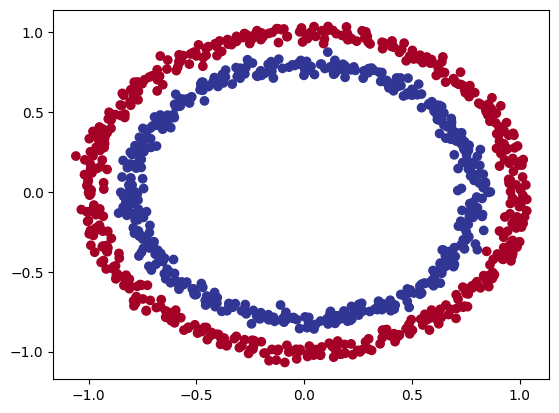

In [34]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

Nice! Now let's split it into training and test sets using `80%` of the data for training and `20%` for testing.

In [35]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

len(X_train), len(y_test)

(800, 200)

### 6.2 Building a model with non-linearity

What kind of pattern do you think you could draw with unlimited straight (linear) and non-straight (non-linear) lines?

I bet you could get pretty creative.

So far our neural networks have only been using linear (straight) line functions.

But the data we've been working with is non-linear (circles).

PyTorch has a bunch of [ready-made non-linear activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) that do similiar but different things.

One of the most common and best performing is [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).

In [36]:
# Build a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() # ReLU is non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation function ?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

*A visual example of what a similar classificiation neural network to the one we've just built (using ReLU activation) looks like. Try create one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/).*

> Question: Where should I put the non-linear activation functions when constructing a neural network? <br><br>
A rule of thumb is to put them in between hidden layers and just after the output layer, however, there is no set in stone option. As you learn more about neural networks and deep learning you'll find a bunch of different ways of putting things together. In the meantine, best to experiment, experiment, experiment.

In [37]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

### 6.3 Training a model with non-linearity

let's create a training and testing loop.

In [38]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put the data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Train
  model_3.train()

  # 1. Forward pass
  train_logits = model_3(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))

  # 2. Calculate loss/acc
  train_loss = loss_fn(train_logits, y_train)
  train_acc = accuracy_fn(y_true = y_train,
                          y_pred = train_preds)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. optimize step
  optimizer.step()

  ### Test
  model_3.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_preds)

  # Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


### 6.4 Evaluating a model trained with non-linear activation functions


Remember how our circle data is non-linear? Well, let's see how our models predictions look now the model's been trained with non-linear activation functions.

In [41]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

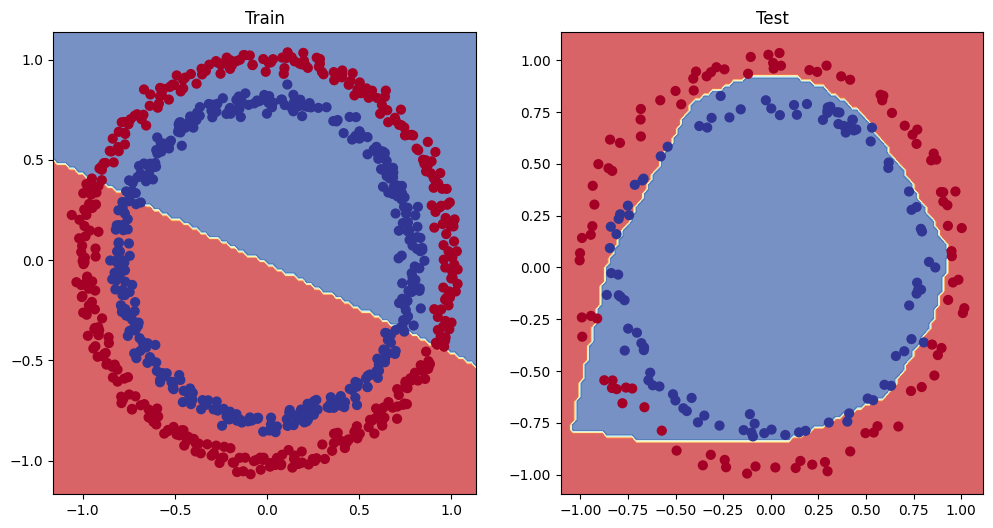

In [40]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

Nice! Not perfect but still far better than before.

Potentially you could try a few tricks to improve the test accuracy of the model? (hint: head back to section 5 for tips on improving the model)